### Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

# отключим вывод варнингов
import warnings
warnings.filterwarnings('ignore')

study = pd.read_csv('stud_math.xls')

In [95]:
display(study.head(10))
study.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [96]:
# Посмотрим сколько нулевых значений в столбцах
study.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [97]:
study.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [98]:
# все названия колонок с маленькой буквы
study.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'mother_edu', 'father_edu',
                     'mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime',
                     'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
                     'freetime', 'goout', 'health', 'absences', 'score']

#### Рассмотрим стосбец school

In [99]:
# Посмотрим, сколько названиу школ содержит наш датасет.
pd.DataFrame(study.school.value_counts())

,school
GP,349
MS,46


In [100]:
study.school.isnull().sum()

0

#### Рассмотрим столбец sex

In [101]:
# Посмотрим, сколько полов содержит наш датсет.
pd.DataFrame(study.sex.value_counts())

,sex
F,208
M,187


In [102]:
study.sex.isnull().sum()

0

Оказась, что девочек и мальчиков почти одинаковое количество

In [103]:
# заменим M и F на male и female для наглядности
study.sex = study.sex.apply(lambda x: 'male' if x == 'M' else 'female' if x == 'F' else x)
pd.DataFrame(study.sex.value_counts())

,sex
female,208
male,187


#### Рассмотрим столбец age

In [104]:
# Посмотрим, каких возрасов дети содержатся в нашем датсет.
pd.DataFrame(study.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [105]:
study.age.isnull().sum()

0

У нас есть выбросы. Но удалять строки с возрастом 20,21,22 года не буду

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

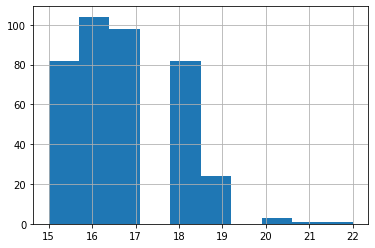

In [106]:
# посмотрим на его распределение:
study.age.hist()
study.age.describe()

# Как видно, у этого признака нормальное распределение, выбросы есть. 

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


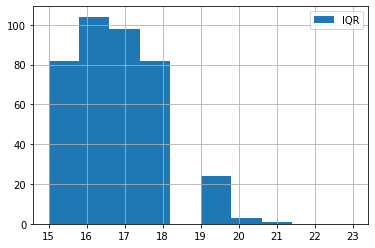

In [107]:
# В данных есть выбросы. Давайте их проверим


median = study.age.median()
IQR = study.age.quantile(0.75) - study.age.quantile(0.25)
perc25 = study.age.quantile(0.25)
perc75 = study.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
study.age.loc[study.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (15, 23), 
                                                                                             label = 'IQR')
plt.legend();

#### Рассмотрим столбец address

In [108]:
# Посмотрим, какие типы адресов содержатся в нашем датсет.
pd.DataFrame(study.address.value_counts())


,address
U,295
R,83


In [109]:
study.address.isnull().sum()

17

In [110]:
# заменим для удобства дальнейшего "чтения" U на urban и R на region
study.address = study.address.apply(lambda x: 'urban' if x == 'U' else 'region' if x == 'R' else x)
pd.DataFrame(study.address.value_counts())

,address
urban,295
region,83


In [111]:
# Заменим пустые значения сначало на NaN

study.address = study.address.astype(str).apply(lambda x: None if x.strip() == '' else x)

""" Как мы видим из нашего распределения, большая часть учеников живет в городе.
Поэтому им до школы добираться быстрее Заменим протуски на 'urban' """

study.address = study.address.apply(lambda x: 'urban' if x == 'nan' else x)

In [112]:
pd.DataFrame(study.address.value_counts())

,address
urban,312
region,83


In [113]:
study.address.isnull().sum()

0

#### Рассмотрим столбец famsize - размер семьи

In [114]:
# Посмотрим, какие типы семей по количеству детей содержатся в нашем датсет.
pd.DataFrame(study.famsize.value_counts())

,famsize
GT3,261
LE3,107


In [115]:
study.famsize.isnull().sum()

27

In [116]:
# Заменим пустые значения сначало на NaN, потом часто встрещающиеся значение

study.famsize = study.famsize.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.famsize = study.famsize.apply(lambda x: 'GT3' if x == 'nan' else x)
pd.DataFrame(study.famsize.value_counts())

,famsize
GT3,288
LE3,107


In [117]:
display(study.famsize.unique())

array(['GT3', 'LE3'], dtype=object)

In [118]:
study.famsize.isnull().sum()

0

Из этого столюца видно что количество семьях  где больше 3 детей, больше в два раза. Поэтому мы смелло заменили пустые значения на количество детей >3

#### Рассмотрим столбец pstatus - статус семейного жилья родителей

In [119]:
# проверим колонку "pstatus" на пропущенные значения
pd.DataFrame(study.pstatus.value_counts())

,pstatus
T,314
A,36


In [120]:
# заменим для удобства понимания T на together и  A на apart
study.pstatus = study.pstatus.apply(lambda x: 'together' if x == 'T' else 'apart' if x == 'A' else x)
pd.DataFrame(study.pstatus.value_counts())

,pstatus
together,314
apart,36


In [121]:
study.pstatus.isnull().sum()

45

In [122]:
# Заменим пустые значения сначало на NaN, потом часто встрещающиеся значение
study.pstatus = study.pstatus.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.pstatus = study.pstatus.apply(lambda x: 'together' if x == 'nan' else x)

In [123]:
pd.DataFrame(study.pstatus.value_counts())

,pstatus
together,359
apart,36


In [124]:
study.pstatus.isnull().sum()

0

Т.к. значение "Вместе" намного привышает значения семей живущих отдельно (радитеди живут порознь), то смело заменяем на более частое.

#### Рассмотрим столбец mother_edu - образание матери

In [125]:
# проверим колонку "mother_edu" на пропущенные
pd.DataFrame(study.mother_edu.value_counts())

,mother_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


In [126]:
study.mother_edu.isnull().sum()

3

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: mother_edu, dtype: float64

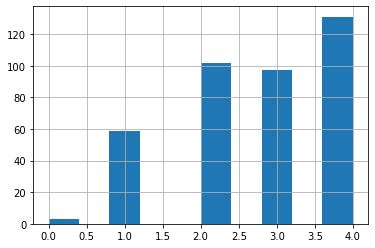

In [127]:
# Посмотрим на его распределение:
study.mother_edu.hist()
study.mother_edu.describe()

# Как видно, у этого признака нормальное распределение.

In [128]:
# В данных есть выбросы. Давайте их проверим      

median1 = study.mother_edu.median()
print("Медиана =", median1)
IQR = study.mother_edu.quantile(0.75) - study.mother_edu.quantile(0.25)
perc25 = study.mother_edu.quantile(0.25)
perc75 = study.mother_edu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Медиана = 3.0
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


Видим, что выбросов в этой колонке нет (собственно, это было видно и из гистограммы)

In [129]:
# Заменим пустые значения на медианное значение
# Т.к. таких значений мало это не повлияет на выборку

study.mother_edu = study.mother_edu.apply(lambda x: median1 if pd.isna(x) == True else x)

In [130]:
# pd.DataFrame(study.mother_edu.value_counts())

In [131]:
display(study.mother_edu.unique())
study.mother_edu.isnull().sum()

array([4., 1., 3., 2., 0.])

0

#### Рассмотрим столбец father_edu

In [132]:
# проверим колонку "father_edu" на пропущенные и странные значения
pd.DataFrame(study.father_edu.value_counts())

,father_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [133]:
study.father_edu.isnull().sum()

24

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: father_edu, dtype: float64

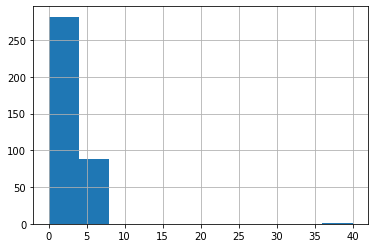

In [134]:
# Посмотрим на его распределение:
study.father_edu.hist()
study.father_edu.describe()

# Как видно, у этого признака нормальное распределение.

Здесь видно, что значение 40 случайно написано, видемо хотели написать 4, заменим его

In [135]:
study.father_edu = study.father_edu.apply(lambda x: 4. if x == 40. else x)
pd.DataFrame(study.father_edu.value_counts())

,father_edu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: father_edu, dtype: float64

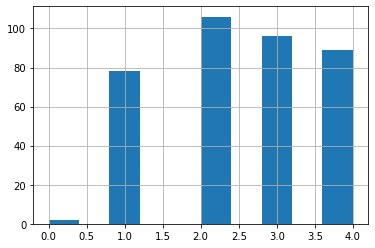

In [136]:
study.father_edu.hist()
study.father_edu.describe()


In [137]:
# посмотрим границы выбросов
median2 = study.father_edu.median()
print('Медиана = ', median2)
IQR = study.father_edu.quantile(0.75) - study.father_edu.quantile(0.25)
perc25 = study.father_edu.quantile(0.25)
perc75 = study.father_edu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Медиана =  2.0
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


Хотя формально значение 0 (то есть нет образования), лежит за пределами границы выбросов, я бы это значение не убирала. Из соображений здравого смысла.

In [138]:
# Заменим пустые значения на медианное значение
# Т.к. таких значений мало это не повлияет на выборку

study.father_edu = study.father_edu.apply(lambda x: median2 if pd.isna(x) == True else x)

In [139]:
pd.DataFrame(study.father_edu.value_counts())

,father_edu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


In [140]:
display(study.father_edu.unique())
study.father_edu.isnull().sum()

array([4., 1., 2., 3., 0.])

0

#### Рассмотрим столбец mother_job - работа матери

In [141]:
# проверим колонку "mother_job" на пропущенные и странные значения
pd.DataFrame(study.mother_job.value_counts())

,mother_job
other,133
services,98
at_home,58
teacher,55
health,32


In [142]:
study.mother_job.isnull().sum()

19

count       376
unique        5
top       other
freq        133
Name: mother_job, dtype: object

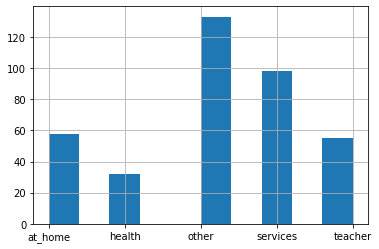

In [143]:
study.mother_job.hist()
study.mother_job.describe()

In [144]:
# Заменим пустые значения сначало на NaN, потом часто встрещающиеся значение
study.mother_job = study.mother_job.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.mother_job = study.mother_job.apply(lambda x: 'other' if x == 'nan' else x)

In [145]:
pd.DataFrame(study.mother_job.value_counts())

,mother_job
other,152
services,98
at_home,58
teacher,55
health,32


In [146]:
display(study.mother_job.unique())
study.mother_job.isnull().sum()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

0

#### Рассмотрим столбец father_job - работа отца

In [147]:
# проверим колонку "father_job" на пропущенные и странные значения
pd.DataFrame(study.father_job.value_counts())

,father_job
other,197
services,102
teacher,29
at_home,16
health,15


In [148]:
study.father_job.isnull().sum()

36

count       359
unique        5
top       other
freq        197
Name: father_job, dtype: object

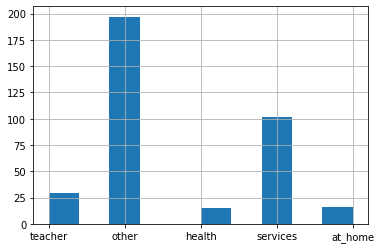

In [149]:
study.father_job.hist()
study.father_job.describe()

In [150]:
# Заменим пустые значения сначало на NaN, потом часто встрещающиеся значение.
# так как на другие менять опасно, с них моло значений, нарушим статистику
study.father_job = study.father_job.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.father_job = study.father_job.apply(lambda x: 'other' if x == 'nan' else x)

In [151]:
pd.DataFrame(study.father_job.value_counts())

,father_job
other,233
services,102
teacher,29
at_home,16
health,15


In [152]:
display(study.father_job.unique())
study.father_job.isnull().sum()

array(['teacher', 'other', 'health', 'services', 'at_home'], dtype=object)

0

#### Рассмотрим столбец reason - причина выбора школы

In [153]:
# проверим колонку "reason" на пропущенные и странные значения
pd.DataFrame(study.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


In [154]:
study.reason.isnull().sum()

17

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

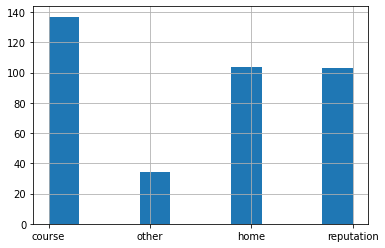

In [155]:
study.reason.hist()
study.reason.describe()

In [156]:
# Заменим пустые значения сначало на NaN, потом часто встрещающиеся значение.
# так как на другие менять опасно, с них моло значений, нарушим статистику
study.reason = study.reason.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.reason = study.reason.apply(lambda x: 'course' if x == 'nan' else x)

In [157]:
pd.DataFrame(study.reason.value_counts())

,reason
course,154
home,104
reputation,103
other,34


In [158]:
display(study.reason.unique())
study.reason.isnull().sum()

array(['course', 'other', 'home', 'reputation'], dtype=object)

0

Причиной выбора школ в большинстве случаев становится образовательная программа.

#### Рассмотрим столбец guardian - кто опекун ребенка

In [159]:
# проверим колонку "guardian" на пропущенные и странные значения
pd.DataFrame(study.guardian.value_counts())

,guardian
mother,250
father,86
other,28


In [160]:
study.guardian.isnull().sum()

31

In [161]:
# Заменим пустые значения сначало на NaN, потом часто встрещающиеся значение.
# так как на другие менять опасно, с них моло значений, нарушим статистику
study.guardian = study.guardian.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.guardian = study.guardian.apply(lambda x: 'mother' if x == 'nan' else x)

In [162]:
pd.DataFrame(study.guardian.value_counts())

,guardian
mother,281
father,86
other,28


In [163]:
display(study.guardian.unique())
study.guardian.isnull().sum()

array(['mother', 'father', 'other'], dtype=object)

0

#### Рассмотрим столбец traveltime - время в пути до школы

In [164]:
# проверим колонку "traveltime" на пропущенные и странные значения
pd.DataFrame(study.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


In [165]:
study.traveltime.isnull().sum()

28

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

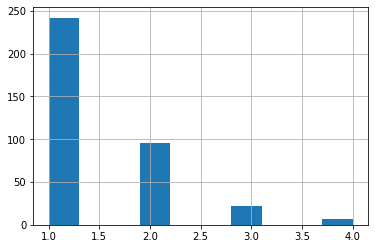

In [166]:
# посмотрим распределение признака в столбце 'traveltime'
study.traveltime.hist()
study.traveltime.describe() 

Из распределения видно, что основная масса учеников живет недалеко от школы.

In [167]:
# посмотрим границы выбросов
median3 = study.traveltime.median()
print('Медиа = ', median3)
IQR = study.traveltime.quantile(0.75) - study.traveltime.quantile(0.25)
perc25 = study.traveltime.quantile(0.25)
perc75 = study.traveltime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Медиа =  1.0
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


За пределами границ выброса, достаточно ощутимое количество учеников - 7 человек. Не исключено, что длительность их путешествия до школы будет сильно влиять на их оценки, так что я не стал бы выкидывать их из датасета.

In [168]:
# Заменим пустые значения на медианное значение
# Т.к. таких значений мало это не повлияет на выборку

study.traveltime = study.traveltime.apply(lambda x: median3 if pd.isna(x) == True else x)

In [169]:
pd.DataFrame(study.traveltime.value_counts())

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


In [170]:
display(study.traveltime.unique())
study.traveltime.isnull().sum()

array([2., 1., 3., 4.])

0

#### Рассмотрим столбец studytime - время на учебу помимо школы в неделю

In [171]:
# проверим колонку "studytime" на пропущенные и странные значения
pd.DataFrame(study.studytime.value_counts())


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


In [172]:
study.studytime.isnull().sum()

7

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

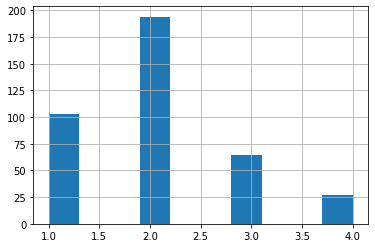

In [173]:
# посмотрим распределение признака в столбце 
study.studytime.hist()
study.studytime.describe() 

In [174]:
# посмотрим границы выбросов
median4 = study.studytime.median()
print('Медиана = ', median4)
IQR = study.studytime.quantile(0.75) - study.studytime.quantile(0.25)
perc25 = study.studytime.quantile(0.25)
perc75 = study.studytime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Медиана =  2.0
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


In [175]:
# Заменим пустые значения на медианное значение
# Т.к. таких значений мало это не повлияет на выборку

study.studytime = study.studytime.apply(lambda x: median4 if pd.isna(x) == True else x)

In [176]:
pd.DataFrame(study.studytime.value_counts())

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


In [177]:
display(study.studytime.unique())
study.studytime.isnull().sum()

array([2., 3., 1., 4.])

0

#### Рассмотрим столбец failures количество внеурочных неудач

In [179]:
# проверим колонку "failures" на пропущенные и странные значения
pd.DataFrame(study.failures.value_counts())


,failures
0.0,293
1.0,49
2.0,16
3.0,15


In [180]:
study.failures.isnull().sum()

22

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

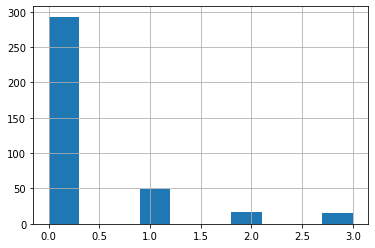

In [181]:
# посмотрим распределение признака в столбце 
study.failures.hist()
study.failures.describe() 

In [182]:
# посмотрим границы выбросов
median5 = study.failures.median()
print('Медиана = ', median5)
IQR = study.failures.quantile(0.75) - study.failures.quantile(0.25)
perc25 = study.failures.quantile(0.25)
perc75 = study.failures.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Медиана =  0.0
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


In [183]:
# Заменим пустые значения на медианное значение
# Т.к. таких значений мало это не повлияет на выборку

study.failures = study.failures.apply(lambda x: median5 if pd.isna(x) == True else x)

In [184]:
pd.DataFrame(study.failures.value_counts())

,failures
0.0,315
1.0,49
2.0,16
3.0,15


In [185]:
display(study.failures.unique())
study.failures.isnull().sum()

array([0., 3., 2., 1.])

0

 #### Рассмотрим столбец schoolsup - дополнительная образовательная поддержка

In [186]:
# проверим колонку "schoolsup" на пропущенные и странные значения
pd.DataFrame(study.schoolsup.value_counts())


,schoolsup
no,335
yes,51


In [187]:
study.schoolsup.isnull().sum()

9

In [188]:
# Заменим пустые значения сначало на NaN, потом заменим на самое большое
# Т.к. таких значений мало это не повлияет на выборку, на другие значения заменять тяжело, так мало значей по другим параметрам

study.schoolsup = study.schoolsup.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.schoolsup = study.schoolsup.apply(lambda x: 'no' if x == 'nan' else x)

In [189]:
pd.DataFrame(study.schoolsup.value_counts())

,schoolsup
no,344
yes,51


In [190]:
display(study.schoolsup.unique())
study.schoolsup.isnull().sum()

array(['yes', 'no'], dtype=object)

0

#### Рассмотрим столбец famsup - семейная образовательная поддердка

In [191]:
# проверим колонку "famsup" на пропущенные и странные значения
pd.DataFrame(study.famsup.value_counts())

,famsup
yes,219
no,137


In [192]:
study.famsup.isnull().sum()

39

In [193]:
# Заменим пустые значения сначало на NaN, потом заменим на самое большое
# Т.к. таких значений мало это не повлияет на выборку, на другие значения заменять тяжело, так мало значей по другим параметрам

study.famsup = study.famsup.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.famsup = study.famsup.apply(lambda x: 'yes' if x == 'nan' else x)

In [194]:
pd.DataFrame(study.famsup.value_counts())

,famsup
yes,258
no,137


In [195]:
display(study.famsup.unique())
study.famsup.isnull().sum()

array(['no', 'yes'], dtype=object)

0

 #### Рассмотрим столбец paid - дополнительные платные занятия по математике

In [196]:
# проверим колонку "paid" на пропущенные и странные значения
pd.DataFrame(study.paid.value_counts())

,paid
no,200
yes,155


In [197]:
# Заменим пустые значения сначало на NaN, попробуем заменить на наибольшее значение, посмтортим как это потом отразиться

study.paid = study.paid.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.paid = study.paid.apply(lambda x: 'no' if x == 'nan' else x)

In [198]:
pd.DataFrame(study.paid.value_counts())

,paid
no,240
yes,155


In [199]:
display(study.paid.unique())
study.paid.isnull().sum()

array(['no', 'yes'], dtype=object)

0

#### Рассмотрим столбец  activities - дополнительные внеучебные задания

In [200]:
# проверим колонку "activities" на пропущенные и странные значения
pd.DataFrame(study.activities.value_counts())

,activities
yes,195
no,186


In [201]:
study.activities.isnull().sum()

14

In [202]:
# Заменим пустые значения сначало на NaN, потом попробуем заменить на наибольшее значение, посмтортим как это потом отразиться

study.activities = study.activities.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.activities = study.activities.apply(lambda x: 'yes' if x == 'nan' else x)

In [203]:
pd.DataFrame(study.activities.value_counts())

,activities
yes,209
no,186


In [204]:
display(study.activities.unique())
study.activities.isnull().sum()

array(['no', 'yes'], dtype=object)

0

#### Рассмотрим столбец nursery - посещал детский сад или нет

In [205]:
# проверим колонку "nursery" на пропущенные и странные значения
pd.DataFrame(study.nursery.value_counts())

,nursery
yes,300
no,79


In [206]:
study.nursery.isnull().sum()

16

In [207]:
# Заменим пустые значения сначало на NaN, потом попробуем заменить на наибольшее значение, посмтортим как это потом отразиться

study.nursery = study.nursery.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.nursery = study.nursery.apply(lambda x: 'yes' if x == 'nan' else x)

In [208]:
pd.DataFrame(study.nursery.value_counts())

,nursery
yes,316
no,79


In [209]:
display(study.nursery.unique())
study.nursery.isnull().sum()

array(['yes', 'no'], dtype=object)

0

#### Рассмотрим столбец studytime, granular

In [210]:
pd.DataFrame(study['studytime, granular'].value_counts())

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


In [211]:
# Это странный столбец studytime умноженный на -3, никакой информации он не несет, так что удалим его

study.drop(['studytime, granular'], inplace = True, axis = 1)

#### Рассмотрим столбец higher - хочет получить высшее образование или нет

In [212]:
pd.DataFrame(study.higher.value_counts())

,higher
yes,356
no,19


In [213]:
study.higher.isnull().sum()

20

In [214]:
# Заменим пустые значения сначало на NaN, потом попробуем заменить на наибольшее значение, посмтортим как это потом отразиться

study.higher = study.higher.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.higher = study.higher.apply(lambda x: 'yes' if x == 'nan' else x)

In [215]:
pd.DataFrame(study.higher.value_counts())

,higher
yes,376
no,19


In [216]:
display(study.higher.unique())
study.higher.isnull().sum()

array(['yes', 'no'], dtype=object)

0

#### Рассмотрим столбец internet - наличие интернета дома

In [217]:
# проверим колонку "internet" на пропущенные и странные значения
pd.DataFrame(study.internet.value_counts())

,internet
yes,305
no,56


In [218]:
study.internet.isnull().sum()

34

In [219]:
# Заменим пустые значения сначало на NaN, потом попробуем заменить на наибольшее значение, посмтортим как это потом отразиться

study.internet = study.internet.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.internet = study.internet.apply(lambda x: 'yes' if x == 'nan' else x)

In [220]:
pd.DataFrame(study.internet.value_counts())

,internet
yes,339
no,56


In [221]:
display(study.internet.unique())
study.internet.isnull().sum()

array(['yes', 'no'], dtype=object)

0

 #### Рассмотрим столбец romantic - в романтических отношениях или нет

In [222]:
# проверим колонку "romantic" на пропущенные и странные значения
pd.DataFrame(study.romantic.value_counts())


,romantic
no,240
yes,124


In [223]:
study.romantic.isnull().sum()

31

In [224]:
# Заменим пустые значения сначало на NaN, потом попробуем заменить на наибольшее значение, посмтортим как это потом отразиться

study.romantic = study.romantic.astype(str).apply(lambda x: None if x.strip() == '' else x)

study.romantic = study.romantic.apply(lambda x: 'no' if x == 'nan' else x)

In [225]:
pd.DataFrame(study.romantic.value_counts())

,romantic
no,271
yes,124


In [226]:
display(study.romantic.unique())
study.romantic.isnull().sum()

array(['no', 'yes'], dtype=object)

0

#### Рассмотрим столбец famrel - семейные отношения

In [227]:
# проверим колонку "famrel" на пропущенные и странные значения
pd.DataFrame(study.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [228]:
study.famrel.isnull().sum()

27

In [229]:
# Здесь видно, что значение -1 случайно написано, видемо хотели написать 1, заменим его


study.famrel = study.famrel.apply(lambda x: 1 if x == -1 else x)
pd.DataFrame(study.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

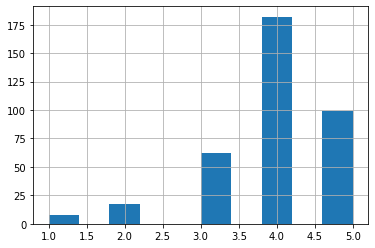

In [230]:
# посмотрим распределение признака в столбце 
study.famrel.hist()
study.famrel.describe() 

In [231]:
# посмотрим границы выбросов
median6 = study.famrel.median()
print('Медиана = ', median6)
IQR = study.famrel.quantile(0.75) - study.famrel.quantile(0.25)
perc25 = study.famrel.quantile(0.25)
perc75 = study.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Медиана =  4.0
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


In [232]:
# Заменим пустые значения на медианное значение
# Т.к. таких значений мало это не повлияет на выборку

study.famrel = study.famrel.apply(lambda x: median6 if pd.isna(x) == True else x)

In [233]:
pd.DataFrame(study.famrel.value_counts())

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


In [234]:
display(study.famrel.unique())
study.famrel.isnull().sum()

array([4., 5., 3., 1., 2.])

0

#### Рассмотрим столбец freetime - свободное время после школы

In [235]:
# проверим колонку "freetime" на пропущенные и странные значения
pd.DataFrame(study.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [236]:
study.freetime.isnull().sum()

11

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

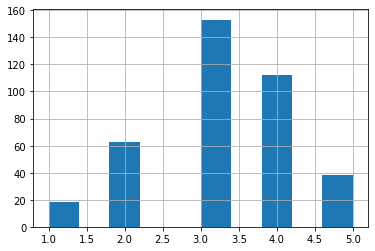

In [237]:
# посмотрим распределение признака в столбце 
study.freetime.hist()
study.freetime.describe() 

In [238]:
# посмотрим границы выбросов
median7 = study.freetime.median()
print('Медиана = ', median7)
IQR = study.freetime.quantile(0.75) - study.freetime.quantile(0.25)
perc25 = study.freetime.quantile(0.25)
perc75 = study.freetime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Медиана =  3.0
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


In [239]:
# Заменим пустые значения на медианное значение
# Т.к. таких значений мало это не повлияет на выборку

study.freetime = study.freetime.apply(lambda x: median7 if pd.isna(x) == True else x)

In [240]:
pd.DataFrame(study.freetime.value_counts())

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


In [241]:
display(study.freetime.unique())
study.freetime.isnull().sum()

array([3., 2., 4., 1., 5.])

0

#### Рассмотрим столбец goout - проведение времени с друзьями

In [242]:
# проверим колонку "goout" на пропущенные и странные значения
pd.DataFrame(study.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [243]:
study.goout.isnull().sum()

8

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

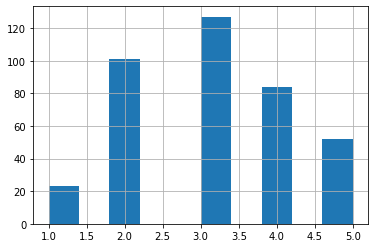

In [244]:
# посмотрим распределение признака в столбце 
study.goout.hist()
study.goout.describe() 

In [245]:
# посмотрим границы выбросов
median8 = study.goout.median()
print('Медиана = ', median8)
IQR = study.goout.quantile(0.75) - study.goout.quantile(0.25)
perc25 = study.goout.quantile(0.25)
perc75 = study.goout.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Медиана =  3.0
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


In [246]:
# Заменим пустые значения на медианное значение
# Т.к. таких значений мало это не повлияет на выборку

study.goout = study.goout.apply(lambda x: median8 if pd.isna(x) == True else x)

In [247]:
pd.DataFrame(study.goout.value_counts())

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


In [248]:
display(study.goout.unique())
study.goout.isnull().sum()

array([4., 3., 2., 1., 5.])

0

#### Рассмотрим столбец health - текущее состояние здоровья

In [249]:
# проверим колонку "health" на пропущенные и странные значения
pd.DataFrame(study.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [250]:
study.health.isnull().sum()

15

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

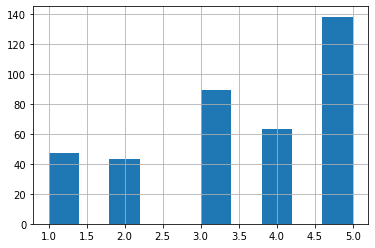

In [251]:
# посмотрим распределение признака в столбце 
study.health.hist()
study.health.describe() 

In [252]:
# посмотрим границы выбросов
median9 = study.health.median()
print('Медиана = ', median9)
IQR = study.health.quantile(0.75) - study.health.quantile(0.25)
perc25 = study.health.quantile(0.25)
perc75 = study.health.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Медиана =  4.0
25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


In [253]:
# Заменим пустые значения на медианное значение
# Т.к. таких значений мало это не повлияет на выборку

study.health = study.health.apply(lambda x: median9 if pd.isna(x) == True else x)

In [254]:
pd.DataFrame(study.health.value_counts())

,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


In [255]:
display(study.health.unique())
study.health.isnull().sum()

array([3., 5., 1., 2., 4.])

0

#### Рассмотрим столбец absences - колличество пропущенных занятий

In [256]:
# проверим колонку "absences" на пропущенные и странные значения
pd.DataFrame(study.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


In [257]:
study.absences.isnull().sum()

12

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

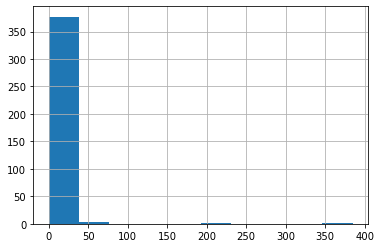

In [258]:
study.absences.hist()
study.absences.describe()

In [260]:
# посмотрим границы выбросов
median10 = study.absences.median()
print('Медиана = ', median10)
IQR = study.absences.quantile(0.75) - study.absences.quantile(0.25)
perc25 = study.absences.quantile(0.25)
perc75 = study.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Медиана =  4.0
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [261]:
# Считаю целесообразно удалмить значения >100, они как раз стоят за границей разброса.
study = study.drop(study['absences'][study.absences > 100].index)

In [262]:
# Заменим пустые значения на медианное значение
# Т.к. таких значений мало это не повлияет на выборку

study.absences = study.absences.apply(lambda x: median10 if pd.isna(x) == True else x)

In [263]:
pd.DataFrame(study.absences.value_counts())

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


In [264]:
display(study.absences.unique())
study.absences.isnull().sum()

array([ 6.,  4., 10.,  2.,  0., 16., 14.,  7.,  8., 25., 12., 54., 18.,
       26., 20., 56., 24., 28.,  5., 13., 15., 22.,  3., 21.,  1., 75.,
       30., 19.,  9., 11., 38., 40., 23., 17.])

0

#### Рассмотрим столбец score - баллы по экзамену по математике

In [265]:
# проверим колонку "score" на пропущенные и странные значения
pd.DataFrame(study.score.value_counts())

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,26
80.0,16


In [266]:
study.score.isnull().sum()

6

count    387.000000
mean      52.196382
std       22.914748
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

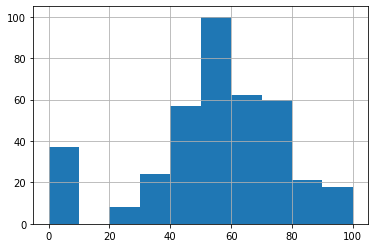

In [267]:
study.score.hist()
study.score.describe()

In [268]:
# посмотрим границы выбросов
median11 = study.score.median()
print('Медиана = ', median11)
IQR = study.score.quantile(0.75) - study.score.quantile(0.25)
perc25 = study.score.quantile(0.25)
perc75 = study.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Медиана =  55.0
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


In [269]:
# Заменим пустые значения на медианное значение
# Т.к. таких значений мало это не повлияет на выборку

study.score = study.score.apply(lambda x: median11 if pd.isna(x) == True else x)

In [270]:
pd.DataFrame(study.score.value_counts())

,score
50.0,54
55.0,52
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,26
80.0,16


In [271]:
display(study.score.unique())
study.score.isnull().sum()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  20.])

0

In [272]:
# Посмотрим еще раз сколько нулевых значений в столбцах
study.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
mother_edu    0
father_edu    0
mother_job    0
father_job    0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         0
dtype: int64

#### Проанализируем корреляцию численных переменных.

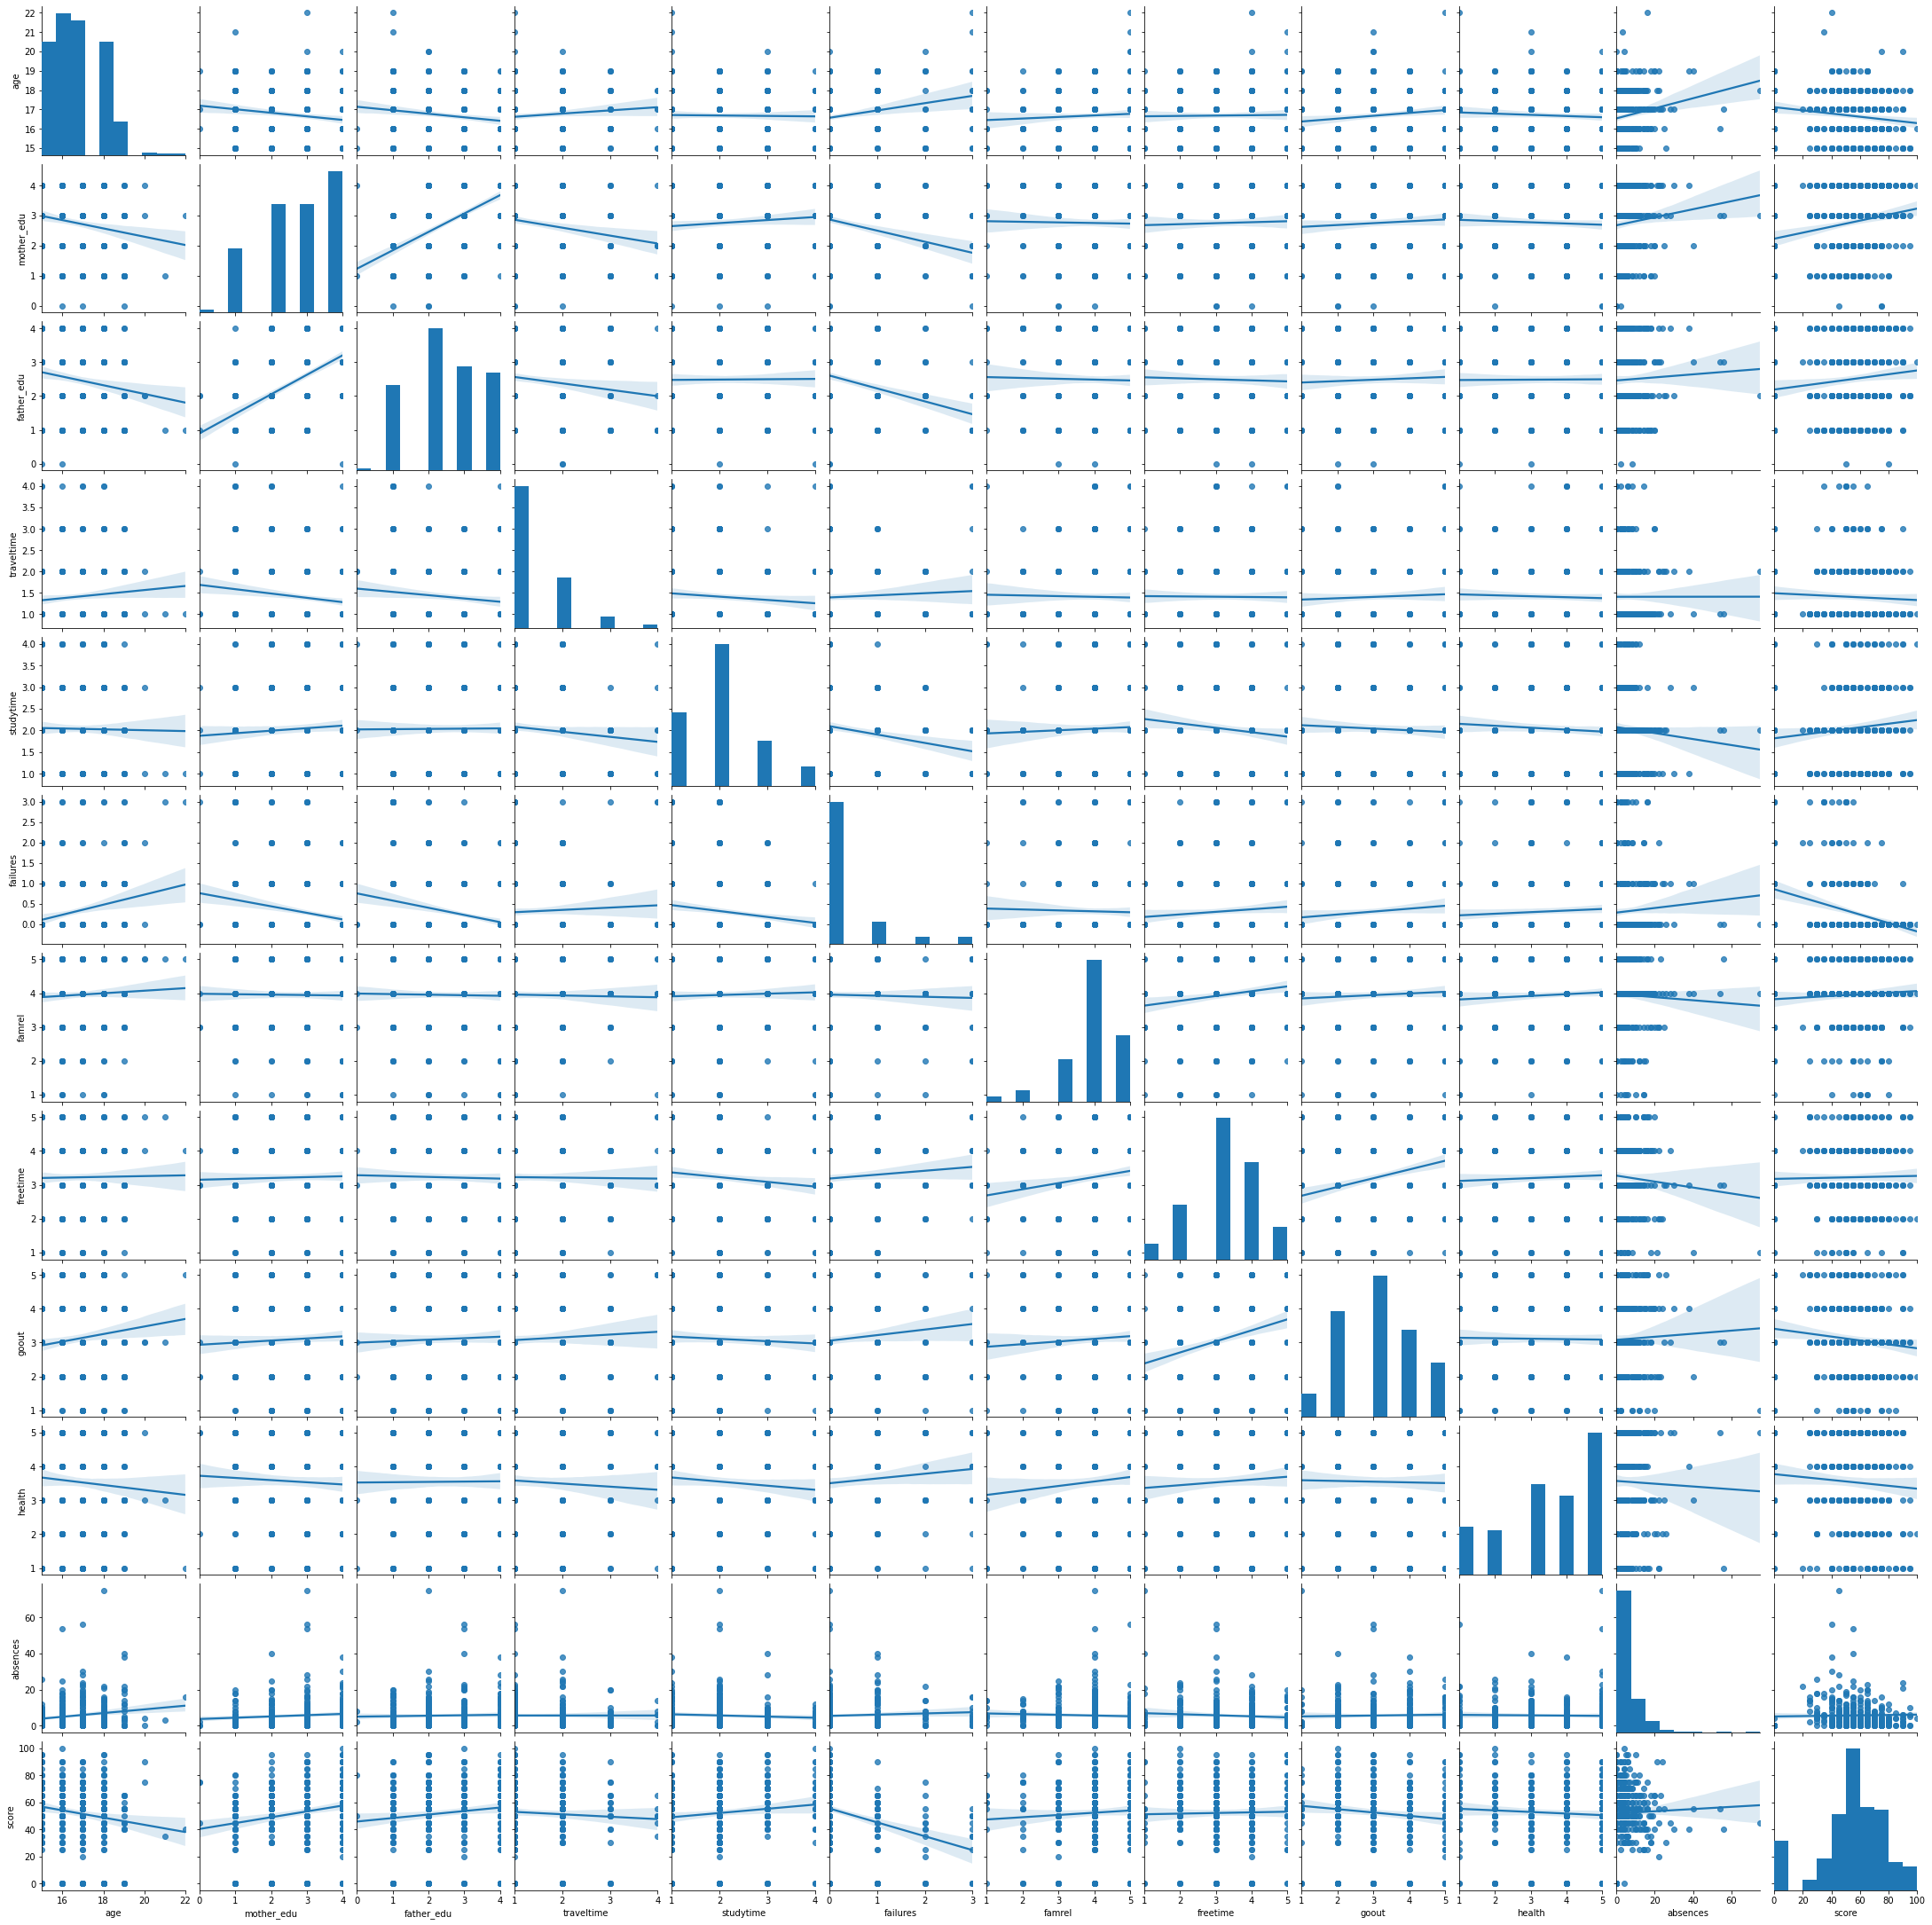

In [274]:
sns.pairplot(study, kind = 'reg')

In [277]:
study.corr()

,age,mother_edu,father_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.159408,-0.152554,0.088761,-0.015255,0.215679,0.055183,0.014402,0.127950,-0.067228,0.163111,-0.148801
mother_edu,-0.159408,1.000000,0.594212,-0.163330,0.076984,-0.243840,-0.015797,0.029138,0.061856,-0.051196,0.096686,0.208351
father_edu,-0.152554,0.594212,1.000000,-0.120768,0.007762,-0.259445,-0.020112,-0.027617,0.042622,0.007011,0.033630,0.120906
traveltime,0.088761,-0.163330,-0.120768,1.000000,-0.094864,0.052967,-0.020799,-0.010127,0.050421,-0.045009,0.000354,-0.053730
studytime,-0.015255,0.076984,0.007762,-0.094864,1.000000,-0.167568,0.037830,-0.119337,-0.051498,-0.073707,-0.065978,0.114818
failures,0.215679,-0.243840,-0.259445,0.052967,-0.167568,1.000000,-0.027212,0.084878,0.108124,0.074023,0.061788,-0.326261
famrel,0.055183,-0.015797,-0.020112,-0.020799,0.037830,-0.027212,1.000000,0.160481,0.061778,0.083385,-0.042087,0.063336
freetime,0.014402,0.029138,-0.027617,-0.010127,-0.119337,0.084878,0.160481,1.000000,0.290287,0.059086,-0.071490,0.020646
goout,0.127950,0.061856,0.042622,0.050421,-0.051498,0.108124,0.061778,0.290287,1.000000,-0.016985,0.032760,-0.119067
health,-0.067228,-0.051196,0.007011,-0.045009,-0.073707,0.074023,0.083385,0.059086,-0.016985,1.000000,-0.023649,-0.071268


#### Анализ номинативных переменных

In [282]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=study)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

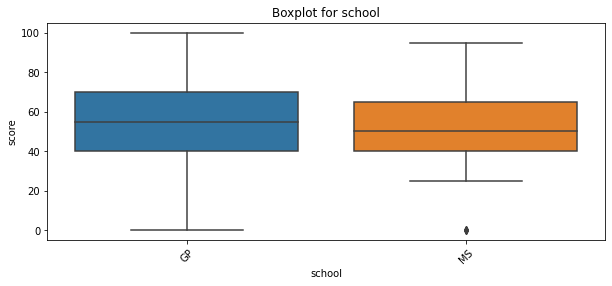

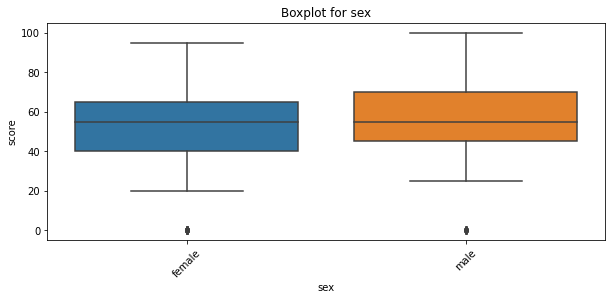

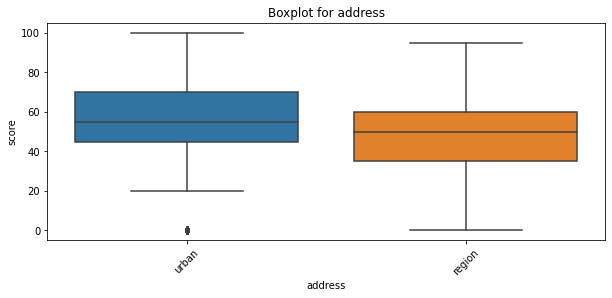

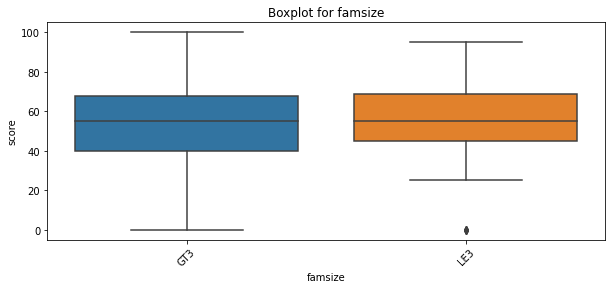

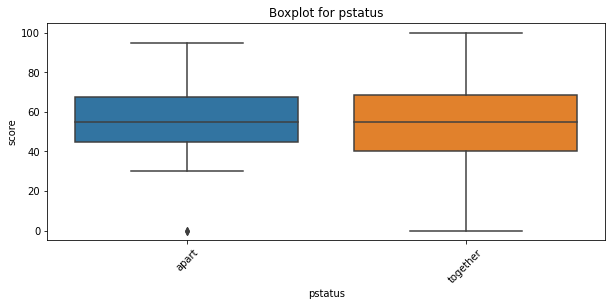

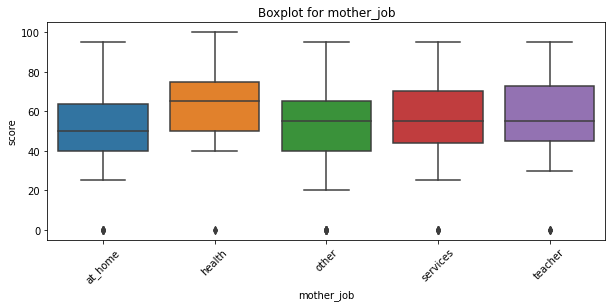

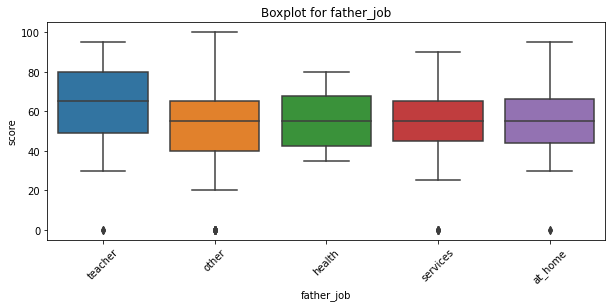

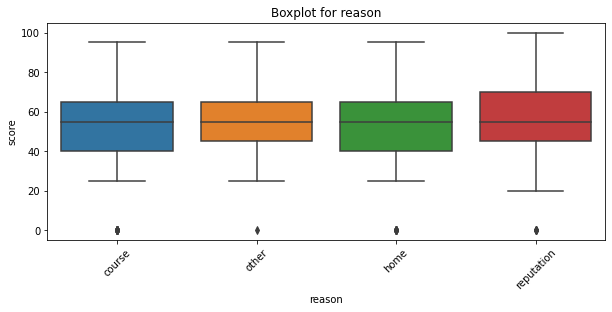

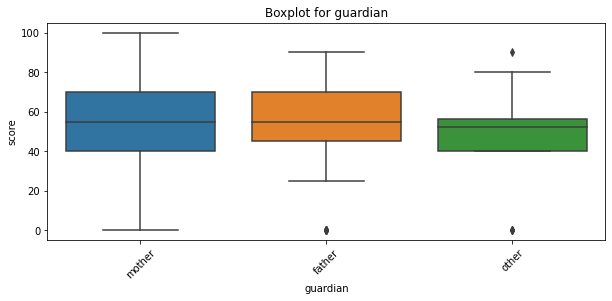

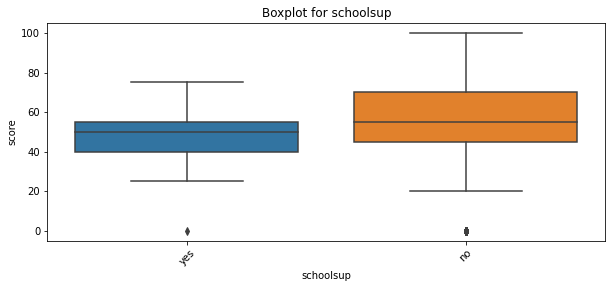

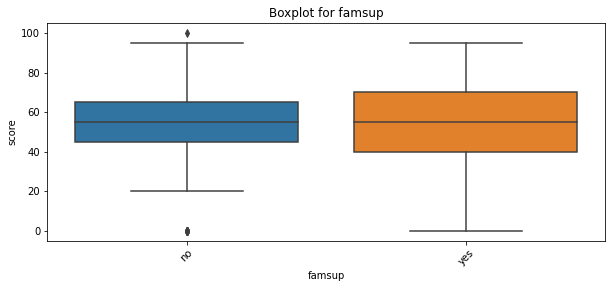

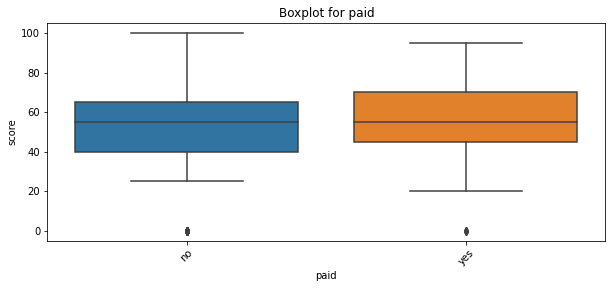

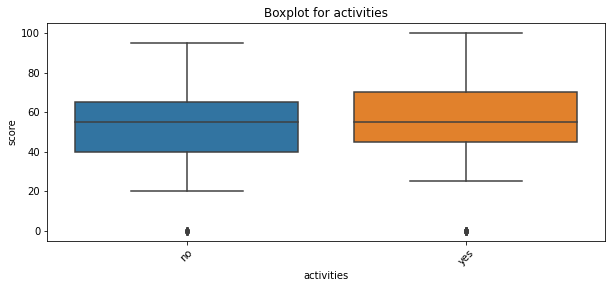

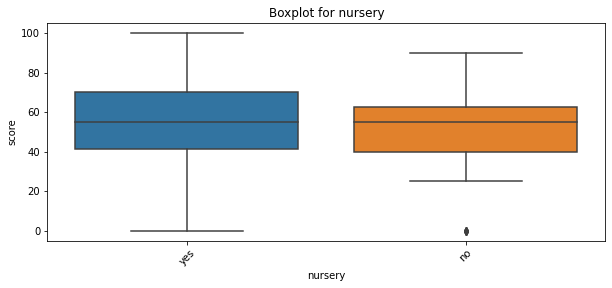

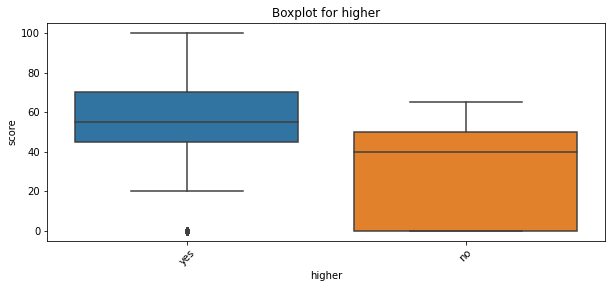

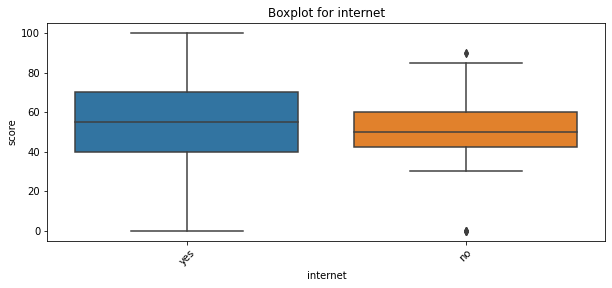

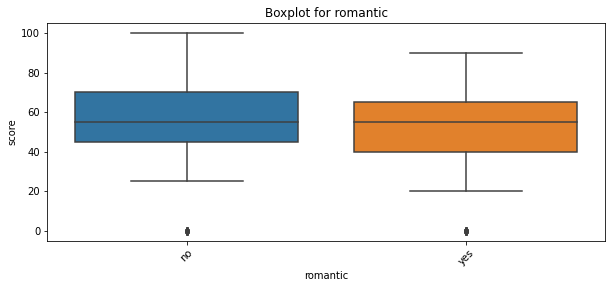

In [283]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mother_job', 'father_job', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [288]:
def get_stat_dif(column):
    cols = study.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(study.loc[study.loc[:, column] == comb[0], 'score'], 
                        study.loc[study.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [290]:
for col in [
    'school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'mother_edu', 'father_edu',
                     'mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime',
                     'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'higher', 'internet', 'romantic', 'famrel',
                     'freetime', 'goout', 'health', 'absences', 'score'
]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_edu
Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки absences
Найдены статистически значимые различия для колонки score


#### Выводы

Судя по графикам и анализу на оценку score практически не вляет выбор школы (school), влияет пол ученика (у мужчин оценки выше, заметно влияет место проживания ученика (оценки городских учеников выше), почти не влияет размер семьи и статус проижвания родителей (вместе или раздельно), влияет работа матери, работа отца влияет только если отец работает учителем (но в этом случае влияние довольно существенное, так что я бы не выбрасывал эту колонку из итогового датасета), причина выбора школы влияет минимально (и то, только в случае с репутацией учебного заведения), статус опекуна оказывает заметное негативное влияние, если опекуном является не родитель школьника, обатная зависимость влияния дополнительной образовательной поддержки (schoolsup) (удивительно, но оценка школьника выше, если дополнительно с ним НЕ занимались), семейная образовательная поддержка (famsup) практически не влияет на результат, так же как и дополнительные платные занятия по предмету, дополнительные внеучебные занятия (activities) оказывают влияние (пусть и не очень значительное) на результаты экзаменов, детским садом (nursery) можно пренебречь, желание продолжать обучение в ВУЗе (higher) оказывает существенное влияние на оценку, наличие интернета влияет не значительно, наличие отношений оказывает заметное отрицательное влияние на оценки.

Статистически значимые колонки:
sex, address, mother_edu, mother_job, failures, paid, higher, romantic, absences, score
